## Please don't forget to fill in this data
Member 1 Name: Youssef Zaki Shalaby

Member 1 ID: 40-0808

Member 1 Tutorial: T-24

Member 2 Name: Lina Mahmoud Elshafei

Member 2 ID: 40-0323

Member 2 Tutorial: T-024


In [1]:
import numpy as np
from PIL import Image,ImageOps
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

def convertImageToArrayRGB(imagefile, grayscale):
    """
    Input: Image .JPG file
    Output: 2D array representing the image.
    """
    imageObject = Image.open(imagefile)
    if not grayscale :
        return np.array(imageObject)
    else :
        gray_image = ImageOps.grayscale(imageObject)
        return np.array(gray_image)
    

img_2 = convertImageToArrayRGB('L41.jpg', False)
img_2_Gray = convertImageToArrayRGB('L41.jpg', True)
img_2_Gray_4k = convertImageToArrayRGB('L4.jpg', True)
img_2_Gray_4k = img_2_Gray_4k.astype(np.uint32)


In [3]:
def CalculateIntegral(arrayImage):
    """
    Input: 2D array representing the image (feel free to use a predefined function to transform an image into an array).
    Output: 2D array representing the integral image.
    """
    height = len(arrayImage)
    width = len(arrayImage[0])
    
    #Init a 3d array of length, width and RGB values
    si = np.zeros(arrayImage.shape)
    si.astype(np.uint32)
    si.setflags(write=1)

    #Add First Coloumn to SI
    for i in range(0,height):
        si[i][0] =  arrayImage[i][0]

    #Get SI    
    for i in range(0,height):
        for j in range(1,width):
            si[i][j] = arrayImage[i][j] + si[i][j-1]
    #Get II
    for j in range(0,width):
        for i in range(1,height):
            si[i][j] = si[i][j] + si[i-1][j]       
    
    return si

In [4]:
#si = CalculateIntegral(img_2)
si_g = CalculateIntegral(img_2_Gray)
si_g_4k = CalculateIntegral(img_2_Gray_4k)
print(si_g[100][100])

693137.0


In [5]:
def CalculateLocalSum(intergralImage, left_corner, right_corner):
    """
    Input: An integral image, and a two pairs of coordinates (𝑝0=(𝑥0,𝑦0),𝑝1=(𝑥1,𝑦1)).
    Output: The local sum for the rectangular area defined by the pair of points (as 𝑝0 being the upper left corner, and 𝑝1 being the lower right corner of this                  rectangular area).
    """
    # Returns Intensity Relative to Origin
    if(left_corner==0 and right_corner!=-1):
        if right_corner[0] == 0 or right_corner[1] == 0:
            #print("BEDANI",intergralImage[right_corner[1]][right_corner[0]],intergralImage[0][0])
            return int(intergralImage[right_corner[1]][right_corner[0]] - intergralImage[0][0])
        return int(intergralImage[right_corner[1]][right_corner[0]] - intergralImage[1][right_corner[0]] - intergralImage[right_corner[1]][1] + intergralImage[1][1])
    #Returns Difference between right and left indicies.
    else:
        #hnafge zero to one
        #print(left_corner,right_corner)
        return int(intergralImage[right_corner[1]][right_corner[0]] + intergralImage[left_corner[1]-1][left_corner[0]-1] - intergralImage[left_corner[1]-1][right_corner[0]]  - intergralImage[right_corner[1]][left_corner[0]-1] ) #Left Y right X
        


##print(CalculateLocalSum(si,(300,300),(500,500)))
#test1 = CalculateLocalSum(si_g,(300,300),(500,500))
#test2 = si_g[500][500]+si_g[300][300]-si_g[300][500]-si_g[500][300]
#print(test1==test2)
#print(test1)
test3 = CalculateLocalSum(si_g_4k,(300,300),(300,300))
print(test3,img_2_Gray_4k[300][300])

28 28


In [199]:
def EdgeDetect(integral_image, kernel_size,image):
    if(kernel_size%2 ==0 or kernel_size ==1):
        print("Size has to be an Odd Number >1")
        return

    #print("Integral Image: \n",integral_image)
    width = len(integral_image[0])
    height = len(integral_image)
    #print(width,height)


    
    
    localSumMatrix = np.copy(integral_image)
    stepSize = math.floor(kernel_size/2)
   
    
    laplace_result = np.copy(localSumMatrix)

    magn = np.zeros(integral_image.shape, dtype = int)
    

    h1_result = np.zeros(integral_image.shape, dtype = int)
    h1_result.astype(np.uint32)
    h1_result.setflags(write=1)

    h2_result = np.zeros(integral_image.shape, dtype = int)
    h2_result.astype(np.uint32)
    h2_result.setflags(write=1)

    print("StepSize",stepSize)
   # for j in range(0,height):
   #     for i in range(0,width):
   #         localSumMatrix[j][i]= CalculateLocalSum(integral_image,0,(i,j))
    
    lmax = 0
    
    for j in range(kernel_size,height-kernel_size):
        for i in range(kernel_size,width-kernel_size):
                   #print("pixel @ ",i,j)
                   X1 = int(i - stepSize) #-2,-2
                   Y1 = int(j - stepSize)
                   
                   X2 = int(i + stepSize)
                   Y2 = int(j - 1)
                   
                   
                   #print(X1,Y2,X2,Y2)
                   h1_upper = CalculateLocalSum(integral_image,(X1,Y1),(X2,Y2))
                   #print("H1 ",h1_upper)

                   X1 = int(i - stepSize) #-2,-2
                   Y1 = int(j + 1)
                   
                   X2 = int(i + stepSize)
                   Y2 = int(j + stepSize)
                   h1_lower = CalculateLocalSum(integral_image,(X1,Y1),(X2,Y2))
                   #print("H2 " ,h1_lower)
                   #print("H1",h1_lower,h1_upper)
                   h1_all = int(h1_upper - h1_lower) #check if we need to divide
                   h1_result[j][i] = int(h1_all)

                   X1 = int(i - stepSize)
                   Y1 = int(j - stepSize)

                   X2 = int(i -  1)
                   Y2 = int(j + stepSize)
                   
                   h2_left = CalculateLocalSum(integral_image,(X1,Y1),(X2,Y2))

                   X1 = int(i + 1)
                   Y1 = int(j - stepSize)

                   X2 = int(i + stepSize)
                   Y2 = int(j + stepSize)

                   h2_right = CalculateLocalSum(integral_image,(X1,Y1),(X2,Y2))
                   h2_all = int(h2_right - h2_left) #check if we need to divide
                   h2_result[j][i] = int(h2_all)
                   #print(h2_all)
                   magn[j][i] = math.floor(math.sqrt(h2_all**2 + h1_all**2))
                   #if magn[j][i]>=255:
                   #     magn[j][i] = 255
                   

                   X1 = int(i - stepSize)
                   Y1 = int(j - stepSize)

                   X2 = int(i + stepSize)
                   Y2 = int(j + stepSize)
                   #256*(image-pmin)/(pmax-pmin)
                   #laplace_result[j][i]  = abs(CalculateLocalSum(integral_image,(X1,Y1),(X2,Y2)) + image[j][i] + kernel_size**2 - 1)
                   laplace_result[j][i]  = abs((image[j][i] * (kernel_size**2))-CalculateLocalSum(integral_image,(X1,Y1),(X2,Y2)))
                   if laplace_result[j][i] >= lmax:
                       lmax = laplace_result[j][i]

    
    laplace_result = (laplace_result/lmax) *255
    

    #laplace_result = laplace_result-np.min(laplace_result)/np.max(laplace_result)

    #print("Local Sum Matrix: \n",localSumMatrix)
    #print("Magnitude: \n",magn) 
    #print("Avrg of Laplace: ",np.mean(laplace_result)) 
    #print(localSumMatrix==integral_image)
  
    magn = magn / np.mean(magn)
    magn = magn * 255 
    magn = np.ceil(magn)
    #imageLaplace = Image.fromarray(laplace_result)
    #imageLaplace.show()
    threshold = np.median(magn)
    print("T is ",threshold)
   
    print(magn)

    #imageP = Image.fromarray(magn)
    #imageP.show()
    
    return magn,laplace_result

   

In [200]:

magn121,laplace_result121 = EdgeDetect(si_g_4k,121,img_2_Gray_4k) 
magn101,laplace_result101 = EdgeDetect(si_g_4k,101,img_2_Gray_4k) 
magn51,laplace_result51 = EdgeDetect(si_g_4k,51,img_2_Gray_4k) 
magn11,laplace_result11 = EdgeDetect(si_g_4k,11,img_2_Gray_4k) 

print(si_g_4k)
print(magn)

StepSize 60
T is  105.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
StepSize 50
T is  99.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
StepSize 25
T is  69.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
StepSize 5
T is  43.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[2.70000000e+01 5.40000000e+01 8.10000000e+01 ... 1.04737000e+05
  1.04764000e+05 1.04791000e+05]
 [5.40000000e+01 1.09000000e+02 1.63000000e+02 ... 2.10170000e+05
  2.10224000e+05 2.10278000e+05]
 [8.10000000e+01 1.64000000e+02 2.45000000e+02 ... 3.15913000e+05
  3.15994000e+05 3.1

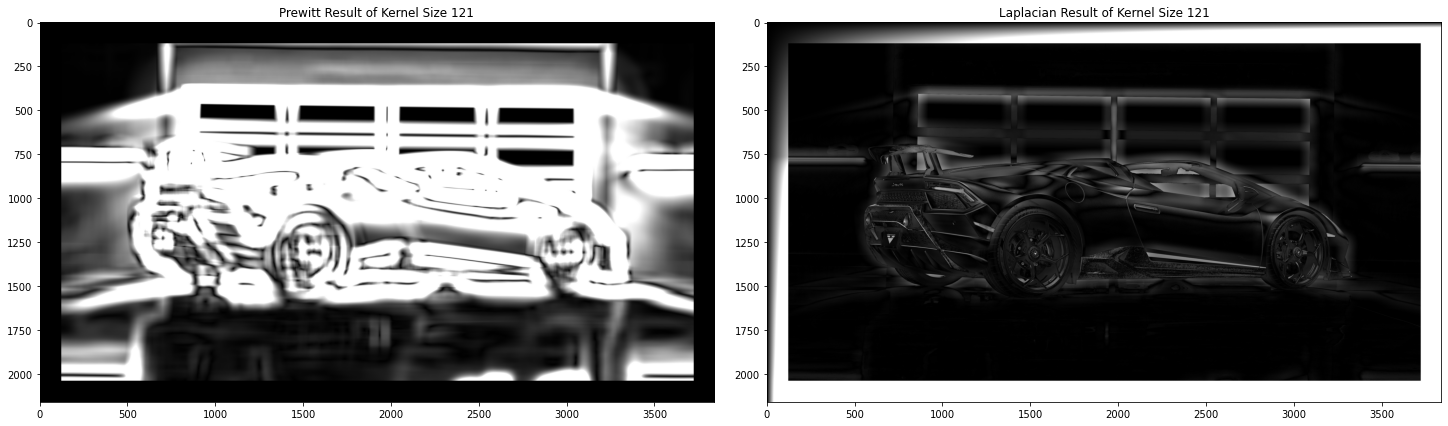

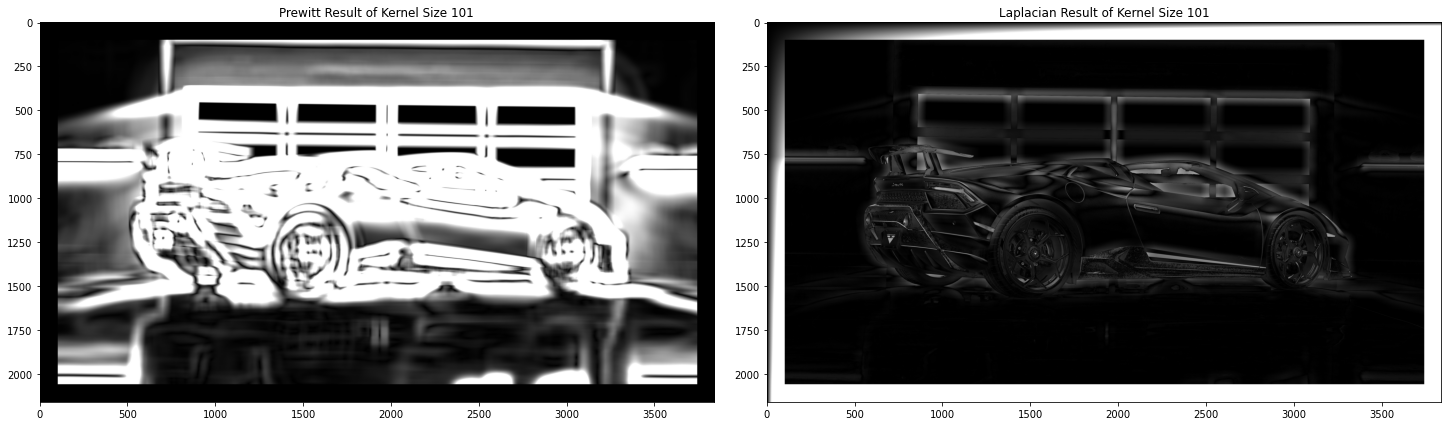

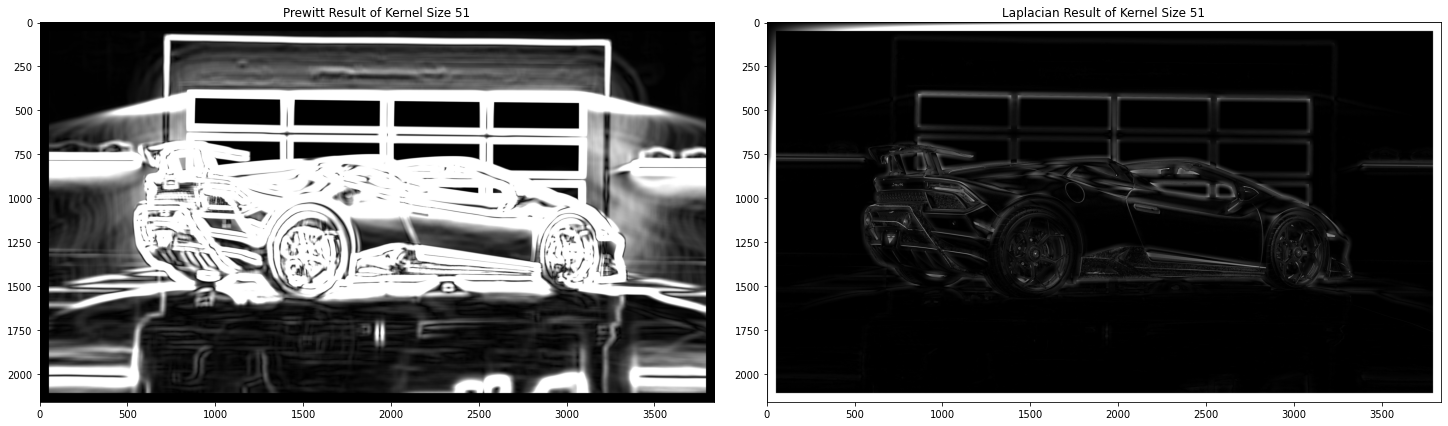

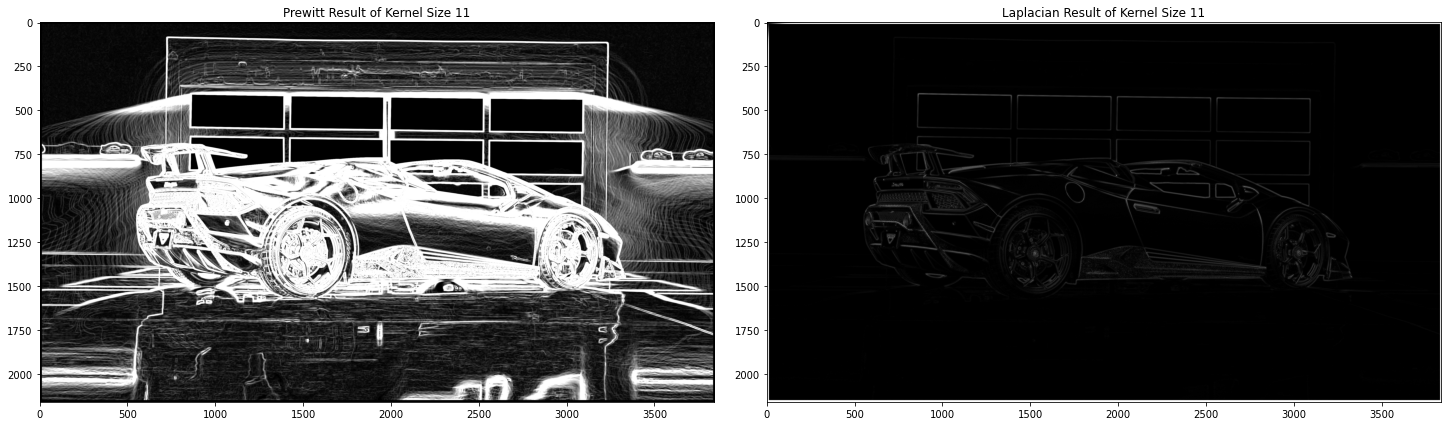

Presentation Complete


In [201]:
arrayPrewitt = [magn121,magn101,magn51,magn11]
arrayLaplace = [laplace_result121,laplace_result101,laplace_result51,laplace_result11]
arrayTitles = ["121","101","51","11"]
for i in range(len(arrayPrewitt)):
    img_p = Image.fromarray(arrayPrewitt[i])
    img_l = Image.fromarray(arrayLaplace[i])
    fig, ax = plt.subplots(1,2,figsize=(20,20),constrained_layout=True)
    ax[0].set_title("Prewitt Result of Kernel Size "+arrayTitles[i])
    ax[1].set_title("Laplacian Result of Kernel Size "+arrayTitles[i])
    ax[0].imshow(img_p,cmap="gray")
    ax[1].imshow(img_l,cmap="gray")
    plt.show()

print("Presentation Complete")


In [202]:
#arrayPrewitt = [magn121,magn101,magn51,magn11]
#arrayLaplace = [laplace_result121,laplace_result101,laplace_result51,laplace_result11]
arrayIntegralPrewitt = []
arrayIntegralLaplace = []
arrayTitles = ["121","101","51","11"]
for i in range(len(arrayPrewitt)):
    prewitt_int = CalculateIntegral(arrayPrewitt[i])
    laplace_int = CalculateIntegral(arrayLaplace[i])
    arrayIntegralPrewitt.append(prewitt_int)
    arrayIntegralLaplace.append(laplace_int)

In [210]:
def RefineEdge(integral_image, kernel_size, ratio,image):
    

    print("Integral Image: \n",integral_image)
    width = len(integral_image[0])
    height = len(integral_image) 
    stepSize = math.floor(kernel_size/2)
    refinedImage = np.copy(integral_image)

    for j in range(stepSize,height-stepSize):
        for i in range(stepSize,width-stepSize):
            X1 = int(i - stepSize)
            Y1 = int(j - stepSize)

            X2 = int(i + stepSize)
            Y2 = int(j + stepSize)

            i_X_Y = CalculateLocalSum(integral_image,(i,j),(i,j))
            mean = CalculateLocalSum(integral_image,(X1,Y1),(X2,Y2)) / kernel_size**2
            if i_X_Y > mean*ratio:
                value = i_X_Y
            else: value = 0
            refinedImage[j][i] = value    

    return refinedImage

In [213]:
IntegralPrewitt51 = arrayIntegralPrewitt[2]
IntegralLaplace51 = arrayIntegralLaplace[2]

graphs_prewit51 = []
graphs_laplace51 = []
ratio = [1.0,1.05,1.15,1.25]
for r in ratio:
    refined51_prewitt = RefineEdge(arrayIntegralPrewitt[2], 51, r,arrayLaplace[2])
    refined51_laplace = RefineEdge(arrayIntegralLaplace[2], 51, r,arrayLaplace[2])
    graphs_prewit51.append(refined51_prewitt)
    graphs_laplace51.append(refined51_laplace)



Integral Image: 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.11873498e+09
  2.11873498e+09 2.11873498e+09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.11873498e+09
  2.11873498e+09 2.11873498e+09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.11873498e+09
  2.11873498e+09 2.11873498e+09]]
Integral Image: 
 [[1.17595216e-02 3.52785649e-02 7.05571298e-02 ... 8.76887489e+04
  8.77343775e+04 8.77800180e+04]
 [3.52785649e-02 1.06271232e-01 2.12542465e-01 ... 2.63683555e+05
  2.63820744e+05 2.63957968e+05]
 [7.05571298e-02 2.12978003e-01 4.25956006e-01 ... 5.28244784e+05
  5.28519600e+05 5.28794487e+05]
 ...
 [2.31823093e+04 8.35820748e+04 1.81550781e+05 ... 3.52325670e

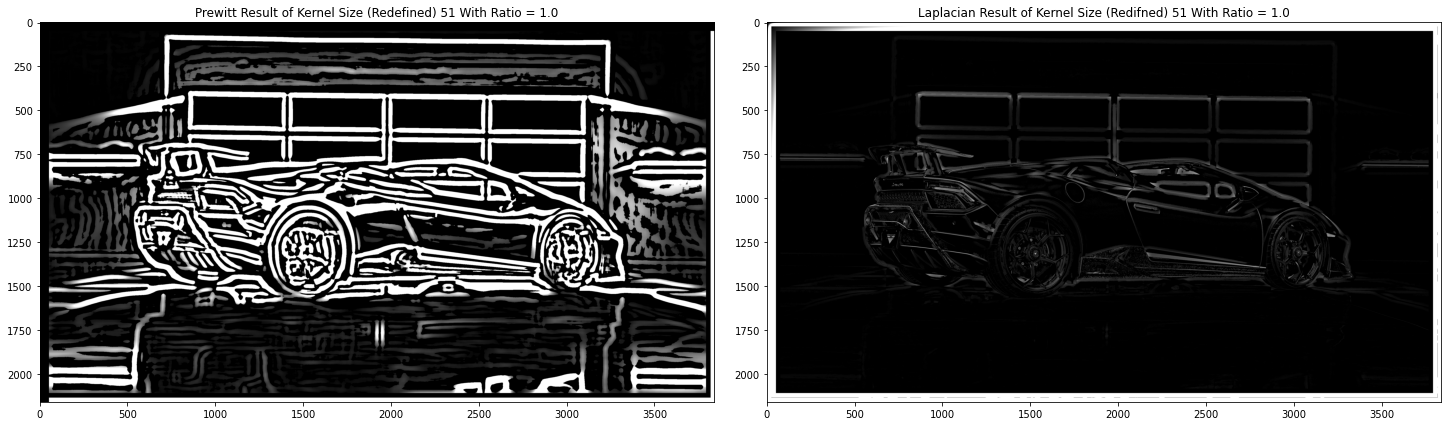

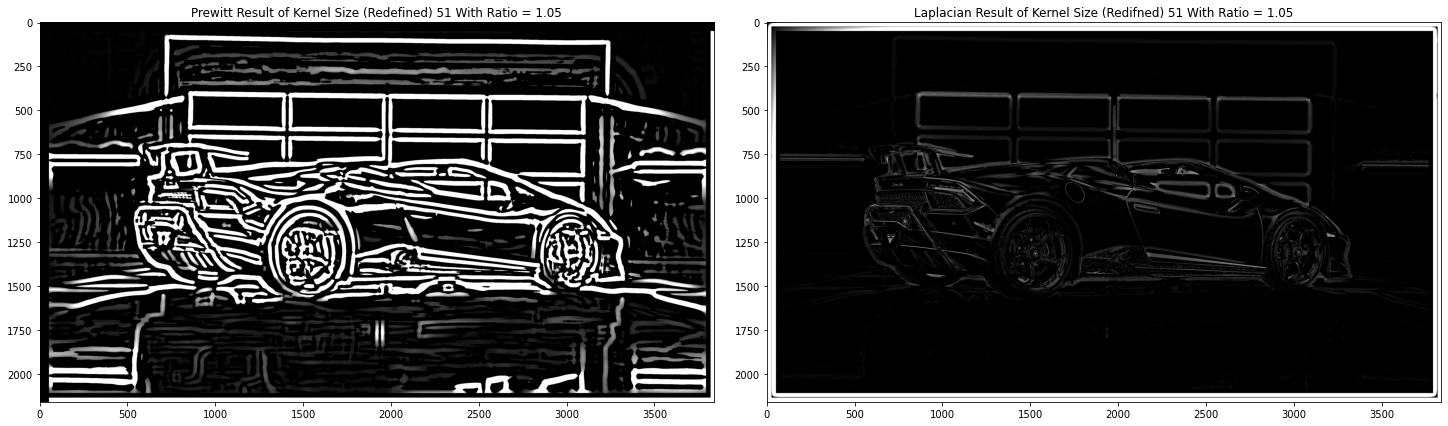

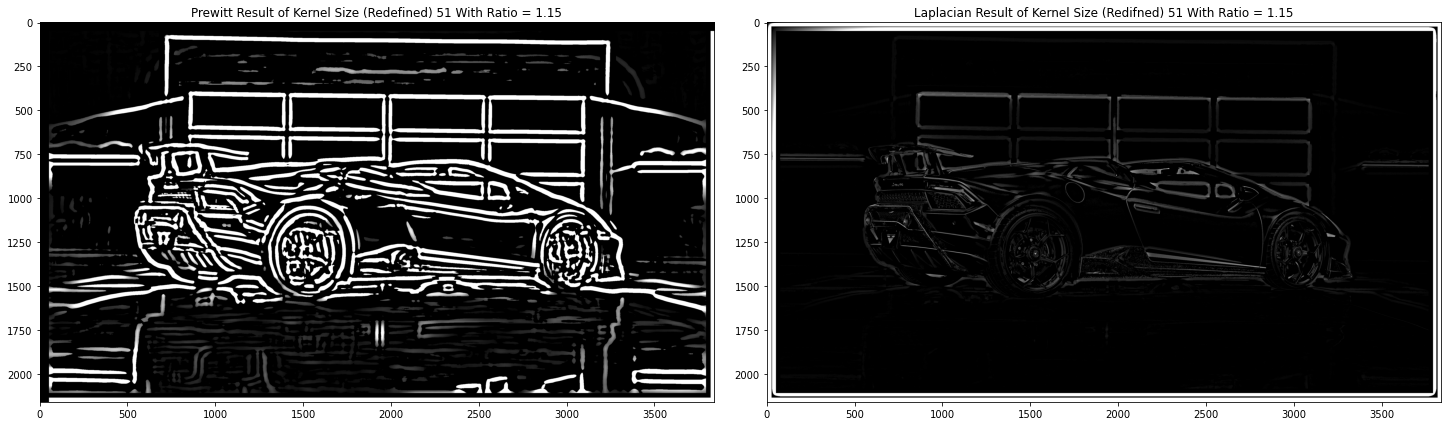

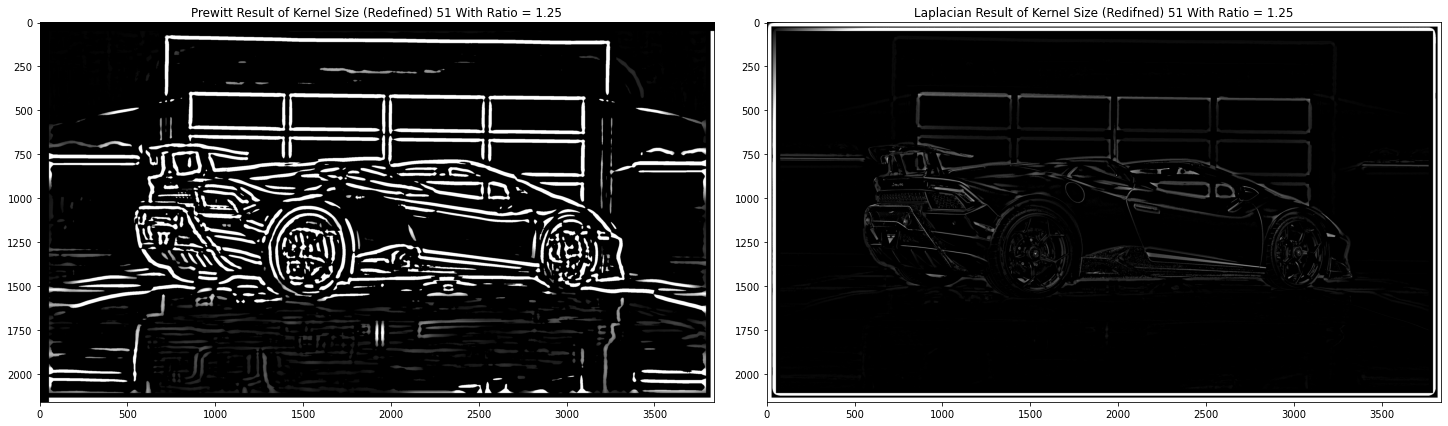

In [216]:
for i in range(len(ratio)):
    img_p = Image.fromarray(graphs_prewit51[i])
    img_l = Image.fromarray(graphs_laplace51[i])
    fig, ax = plt.subplots(1,2,figsize=(20,20),constrained_layout=True)
    ax[0].set_title("Prewitt Result of Kernel Size (Redefined) 51 With Ratio = " + str(ratio[i]))
    ax[1].set_title("Laplacian Result of Kernel Size (Redifned) 51 With Ratio = " + str(ratio[i]))
    ax[0].imshow(img_p,cmap="gray")
    ax[1].imshow(img_l,cmap="gray")
    plt.show()